# Chapter 6 - Generalising to higher dimensions

In [14]:
from matplotlib import pyplot as plt

In [1]:
# 2D Vectors
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __add__(self, v2):
        return self.add(v2)

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)
        

    def __repr__(self):
        return f"Vec2({self.x}, {self.y})"


print(Vec2(4,3).add(Vec2(1,-1)))
print(Vec2(4,3).scale(5))
print(Vec2(3,4) == Vec2(3,4))
print(Vec2(4,3) * 10)
print(10 * Vec2(4,3))

Vec2(5, 2)
Vec2(20, 15)
True
Vec2(40, 30)
Vec2(40, 30)


In [2]:
# 3D Vectors
class Vec3():
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z

    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def scale(self,scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)

    def __eq__(self,other):
        return (self.x == other.x and self.y == other.y and self.z == other.z)

    def __add__(self, other):
        return self.add(other)

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)

    def __repr__(self):
        return f"Vec3({self.x},{self.y},{self.z})"

print(Vec3(1,2,3))
print(Vec3(1,2,3) * 2)
print(Vec3(1,2,3) == Vec3(1,2,3))

Vec3(1,2,3)
Vec3(2,4,6)
True


In [3]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass

    @abstractmethod
    def add(self, other):
        pass

    @classmethod
    @abstractproperty
    def zero(cls):
        pass

    def __neg__(self):
        return self.scale(-1)    

    def __add__(self, other):
        return self.add(other)

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)

    def __truediv__(self, scalar):
        return self.scale(1.0/scalar)

    def subtract(self, other):
        return self.add(-1 * other)

    def __sub__(self, other):
        return self.subtract()


In [4]:
from math import isclose

class Vec2(Vector):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, v2):
        assert self.__class__ == other.__class__
        return Vec2(self.x + v2.x, self.y + v2.y)

    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

    def zero(self):
        return Vec2(0,0)

    def approx_equal_vec2(self, other):
        return isclose(self.x, other.x) and isclose(self.y, other.y)

    def __eq__(self, other):
        assert self.__class__ == other.__class__
        return self.approx_equal_vec2(other)

    def __repr__(self):
        return f"Vec2({self.x}, {self.y})"

In [5]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def add(self, other):
        return Vec3(self.x + other.x,
                    self.y + other.y,
                    self.z + other.z)

    def scale(self, scalar):
        return Vec3(self.x * scalar,
                    self.y * scalar,
                    self.z * scalar)

    def approx_equal_vec3(self, other):
        return isclose(self.x, other.x) and isclose(self.y, other.y) and isclose(self.z, other.z)

    def __eq__(self, other):
         return self.approx_equal_vec3(other) 

    def __repr__(self):
        return f"Vec3({self.x}, {self.y}, {self.z})"

In [6]:
from abc import abstractproperty
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

def distance(v1,v2):
    return length(subtract(v1,v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

def scale(scalar,v):
    return tuple(scalar * coord for coord in v)
    
class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass

    def __init__(self, *coordinates):
        self.coordinates = tuple(x for x in coordinates)

    def add(self,other):
        return self.__class__(*add(self.coordinates, other.coordinates))

    def scale(self,scalar):
        return self.__class__(*scale(scalar, self.coordinates))

    def __repr__(self):
        return f"{self.__class__.__qualname__}{self.coordinates}"



In [7]:
class Vec6(CoordinateVector):
    def dimension(self):
        return 6

In [8]:
Vec6(1,2,3,4,5,6) + Vec6(11,12,13,14,15,16)

Vec6(12, 14, 16, 18, 20, 22)

In [9]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

In [10]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

In [12]:
class LinearFunction(Vector):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def add(self, v):
        return LinearFunction(self.a + v.a, self.b + v.b)
    def scale(self, scalar):
        return LinearFunction(scalar * self.a, scalar * self.b)
    def __call__(self, input):
        return self.x * input + self.y
    @classmethod
    def zero(cls):
        return LinearFunction(0,0,)

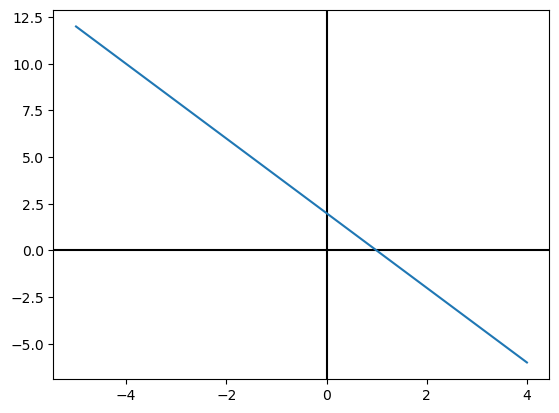

In [18]:
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)
        
plot([LinearFunction(-2,2)], -5,4)

In [29]:
from random import uniform, randint

def random_scalar():
    return uniform(-10,10)

def random_vec2():
    return Vec2(random_scalar(),random_scalar())

In [30]:
def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    #new tests
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(Vec2.zero(), approx_equal_vec2, a,b,u,v,w)

TypeError: Vec2.zero() missing 1 required positional argument: 'self'

In [24]:
class Function(Vector):
    def __init__(self, f):
        self.function = f
    def add(self, other):
        return Function(lambda x: self.function(x) + other.function(x))
    def scale(self, scalar):
        return Function(lambda x: scalar * self.function(x))
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)
    def __call__(self, arg):
        return self.function(arg)

In [27]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
    def _repr_latex_(self):
        monomials = [repr(coefficient) if power == 0 
                               else "x ^ {%d}" % power if coefficient == 1
                               else "%s x ^ {%d}" % (coefficient,power) 
                               for (power,coefficient) in enumerate(self.coefficients) 
                               if coefficient != 0]
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

def random_function():
    degree = randint(0,5)
    p = Polynomial(*[uniform(-10,10) for _ in range(0,degree)])
    return Function(lambda x: p(x))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_function(), random_function(), random_function()
    test(Function.zero(), approx_equal_function, a,b,u,v,w)

NameError: name 'test' is not defined